In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from collections import OrderedDict
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import reprlib

In [2]:
clf = svm.SVC(kernel='linear', random_state=42)

In [3]:
# Pastikan untuk mengganti path dengan absolute path direktorimu jika baris berikut dijalankan ulang, atau restart kernel.
base = 'ganjar_label.csv'
lb = 'ganjar_senti.csv'

Corpus = pd.read_csv(base, encoding='latin-1', sep=',')
Label = pd.read_csv(lb, encoding='latin-1', header=None, names=['label'], dtype=str)

In [4]:
neg, pos = (Label['label'][Label['label']=='negatif']).count(), (Label['label'][Label['label']=='positif']).count()
print('neg:', neg, '(', '{0:.2f}'.format(neg/(neg+pos)*100), '%)','\t', 'pos:', pos, '(', '{0:.2f}'.format(pos/(neg+pos)*100),'%)')

neg: 1844 ( 47.12 %) 	 pos: 2069 ( 52.88 %)


In [5]:
Corpus = pd.DataFrame(Corpus[['stemming', 'label']])
Corpus

stemming    label
0     ['kuat', 'pondasi', 'menang', 'sahabat', 'depo...  positif
1     ['moga', 'lanjut', 'pimpin', 'nasional', 'pres...  negatif
2     ['ajar', 'reformasi', 'birokrasi', 'menangtota...  negatif
3     ['kuat', 'pondasi', 'menang', 'sahabat', 'depo...  positif
4     ['ajar', 'reformasi', 'birokrasi', 'menangtota...  negatif
...                                                 ...      ...
3908  ['urus', 'edan', 'urus', 'pasu', 'sopir', 'bec...  positif
3909  ['rawan', 'gapura', 'nusantara', 'purnawirawan...  positif
3910  ['dukung', 'galang', 'sahabatganjar', 'menang'...  positif
3911  ['gubernur', 'jateng', 'remaja', 'nikah', 'mud...  negatif
3912  ['ayah', 'presiden', 'semangat', 'abdi', 'bang...  negatif

[3913 rows x 2 columns]

C:\Users\wols88\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Fold 0:
accuracy: 0.8199233716475096
precision: 0.828042328042328
[[329  65]
 [ 76 313]]
# Fold 1:
accuracy: 0.8378033205619413
precision: 0.8681592039800995
[[307  53]
 [ 74 349]]
# Fold 2:
accuracy: 0.8390804597701149
precision: 0.8681592039800995
[[308  53]
 [ 73 349]]
# Fold 3:
accuracy: 0.8081841432225064
precision: 0.8582887700534759
[[311  53]
 [ 97 321]]
# Fold 4:
accuracy: 0.819693094629156
precision: 0.859375
[[311  54]
 [ 87 330]]


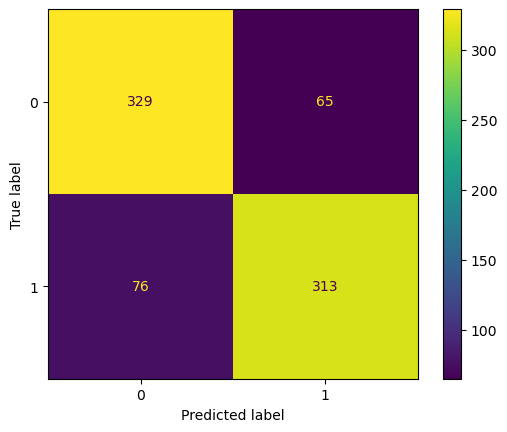

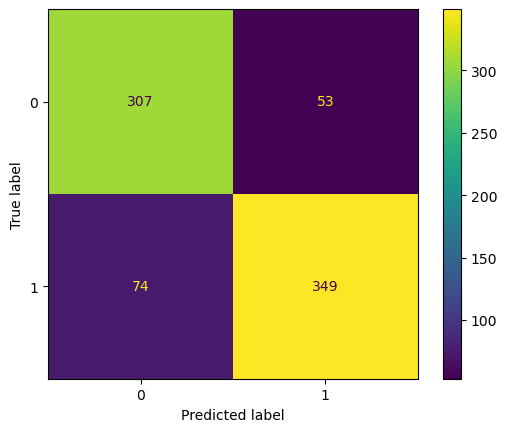

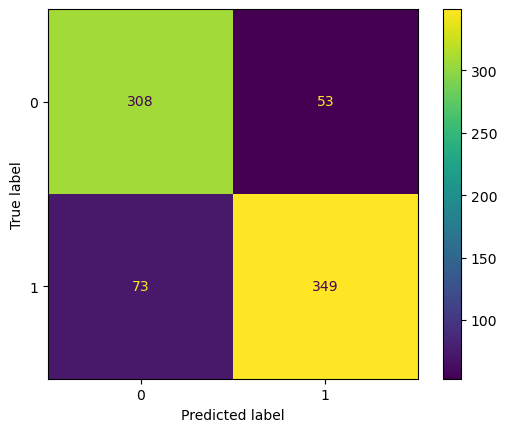

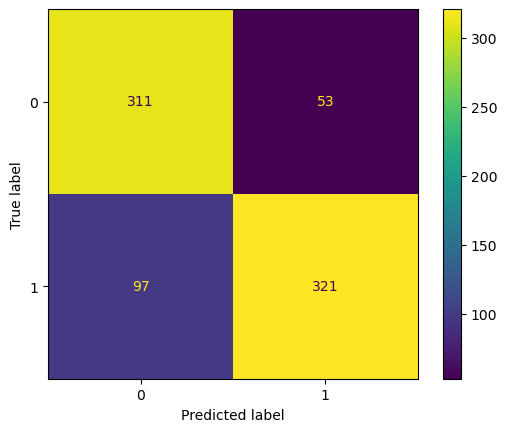

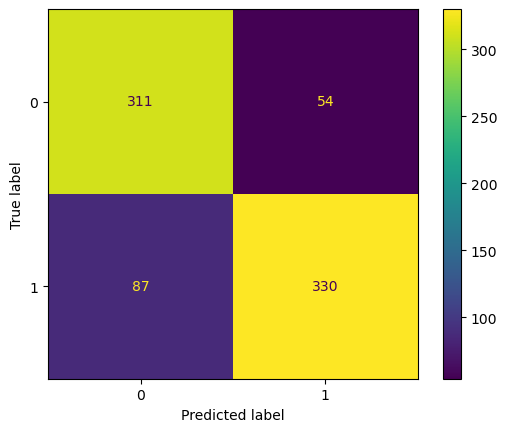

In [6]:
featExt = 'tfidf'

Encoder = LabelEncoder()

Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(Corpus['stemming'])

X = Tfidf_vect.fit_transform(Corpus['stemming'])
y = Corpus[['label']]
y = Encoder.fit_transform(y)
# print(y)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#     print(train_index, test_index)
    
    clf.fit(X_train, y_train)
#     print(clf.coef_)
#     print(clf.intercept_)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'# Fold {fold}:')
#     print(f"  Train: index={train_index}")
#     print(f"  Test:  index={test_index}")
    
#     print(classification_report(y_true_test, y_pred), "\n")
    print(f'accuracy: {accuracy}')
    print(f'precision: {precision}')
# membuat confusion Matrix
    matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    matrix.plot()  
    print(conf_matrix)